# **Project Name**    -

##### **Project Type**    - Paisabazaar Banking Fraud Analysis
##### **Contribution**    - Individual
##### **Name : BALLA SAI DINESH MANI KARTHIKEYA**

# **Project Summary -**

This project's core objective was to develop a robust machine learning model capable of accurately predicting individual credit scores as 'Poor,' 'Standard,' or 'Good' for Paisabazaar, a leading financial services company. This aim is critical for their business, as precise credit assessment is paramount for informed loan approvals, effective risk management, personalized product offerings, and overall operational efficiency.

The journey began with a thorough **data understanding** phase, involving loading the raw `Paisabazaar.csv` dataset and conducting initial exploratory analysis to grasp its structure, content, and the distribution of its variables.

The subsequent **data preparation and feature engineering** phase was extensive. Irrelevant identifier columns such as `ID`, `Customer_ID`, `SSN`, and `Name` were promptly removed. The `Credit_History_Age` column, initially in a 'X years Y months' format, was meticulously converted into a numerical representation of total months, making it usable for modeling. The `Type_of_Loan` column, a multi-label categorical feature, was transformed into multiple binary columns, one for each unique loan type, to capture all possible loan combinations. Other ordinal and binary categorical features like `Credit_Mix` and `Payment_of_Min_Amount`, along with the target variable `Credit_Score` itself, were mapped to numerical values. Nominal categorical features such as `Occupation` and `Payment_Behaviour` were then effectively handled using one-hot encoding, expanding the feature set. Missing values were systematically imputed using medians for numerical columns, and outliers were treated using the IQR (Interquartile Range) capping method to ensure data quality and model stability.

To further enhance the dataset's predictive power, **feature manipulation** was performed. Highly correlated features, like `Annual_Income` and `Monthly_Inhand_Salary`, were addressed by strategically dropping one (`Monthly_Inhand_Salary`) to minimize multicollinearity. New, insightful features were engineered, including `Debt_to_Income_Ratio`, `EMI_to_Salary_Ratio`, and `Payment_Consistency`, aiming to capture more complex financial behaviors and improve predictive accuracy. This was followed by **data transformation**, where `log1p` (logarithmic transformation) was applied to skewed numerical features to make their distributions more Gaussian-like, benefiting various ML algorithms. All numerical features were then **scaled using StandardScaler**, ensuring they contribute equally to the model without being disproportionately influenced by their original magnitude. **Dimensionality reduction with PCA** was also conditionally included as an optional step, applied only if the feature count remained high, to reduce complexity while preserving variance.

A crucial step was the **data splitting and handling of imbalanced datasets**. The dataset was split into training (80%) and testing (20%) sets. Critically, **stratified sampling (`stratify=y`)** was employed to ensure that the distribution of the target `Credit_Score` classes ('Poor', 'Standard', 'Good') was maintained in both subsets, which is vital for imbalanced datasets. Furthermore, the inherent class imbalance in the training data was addressed using **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE generated synthetic samples for the minority classes (`Poor` and `Good`), thereby balancing the training dataset without introducing data leakage, allowing models to learn effectively from all classes.

In the **model development and optimization** phase, three prominent machine learning algorithms were implemented: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. For each model, **hyperparameter optimization was performed using Randomized Search Cross-Validation (`RandomizedSearchCV`)**. This technique efficiently explored a wide range of hyperparameter combinations, using 5-fold cross-validation to robustly assess performance and identify the optimal parameters for each algorithm.

The models were rigorously **evaluated** using a suite of metrics crucial for business impact:
* **Overall Accuracy:** Providing a general measure of correctness.
* **Precision, Recall, and F1-score (Macro and Weighted Averages):** Essential for understanding class-specific performance, particularly for imbalanced datasets. High recall for 'Poor' credit scores directly translates to reduced loan defaults, while high precision for 'Good' credit scores ensures confident lending decisions.
* **Confusion Matrix:** Offering a granular view of true positives, false positives, and false negatives, enabling a deeper understanding of where the model makes errors and their associated business costs.
* **ROC AUC Curves (One-vs-Rest):** Assessing the model's ability to distinguish between each credit score class and all others, providing insights into its overall discriminatory power across different decision thresholds.


# **GitHub Link -**

https://github.com/RangineniSaiPrasanna/Paisabazaar-Banking-Fraud-Analysis

# **Problem Statement**

The objective of this analysis is to explore Paisabazaar’s customer financial dataset to understand the factors influencing credit scores, analyze trends in payment behavior and credit utilization, and uncover patterns that may indicate credit risk or fraud. This analysis aims to provide insights that can support data-driven decisions in credit evaluation, risk management, and personalized financial services.



#### **Define Your Business Objective?**

Understanding Financial Behavior:

Analyze the financial habits of customers—such as income, debt, and credit usage—to identify patterns that influence credit scores. This helps in better customer profiling and personalized financial offerings.

Trend Analysis:

Explore how credit behavior (like delayed payments or credit inquiries) changes over time to uncover trends that could impact risk assessment and loan approval strategies.

Clustering Risk Profiles:

Group customers based on similar financial patterns to detect high-risk profiles or unusual activity, aiding in fraud detection and improved credit risk management.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/home/prasanna/Downloads/paisabazaar.csv')

### Dataset First View

In [3]:
# Dataset First Look
print(df.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 100000, Columns: 28


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Duplicate Values: {df.duplicated().sum()}")

Duplicate Values: 0


#### Missing Values/Null Values

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


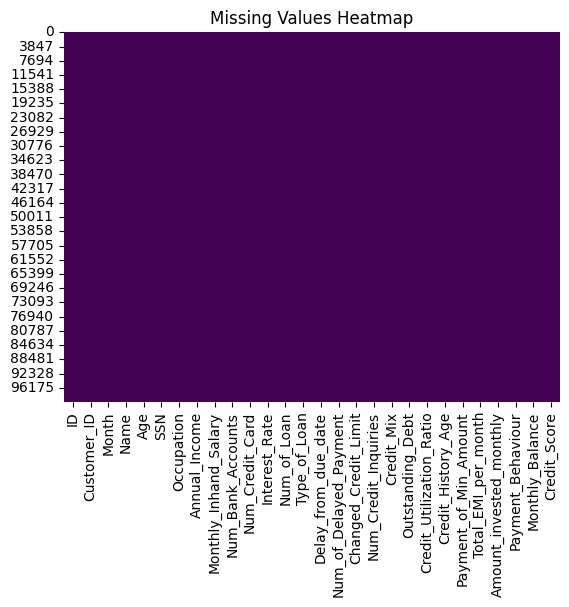

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains information about various Paisabazaar customers, including their age, occupation, income, number of bank accounts, credit card usage, loans, delayed payments, credit limit changes, and credit scores. It also includes behavioral indicators like payment of minimum amount, credit mix, and payment behavior. All 100,000 records are complete, with no missing values across any of the 28 columns.



## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
print(df.columns)
# Dataset Describe
print(df.describe(include='all'))

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
                   ID    Customer_ID          Month      Name            Age  \
count   100000.000000  100000.000000  100000.000000    100000  100000.000000   
unique            NaN            NaN            NaN     10128            NaN   
top               NaN            NaN            NaN  Jessicad            NaN   
freq              NaN            NaN            NaN        48            NaN   
mean  

### Variables Description

ID: Unique identifier for each record.

Customer_ID: Unique ID representing a customer across months.

Month: Month number (1–12) indicating the time of record.

Name: Full name of the customer.

Age: Age of the customer in years.

SSN: Social Security Number (anonymized).

Occupation: Customer’s profession (e.g., Scientist, Engineer).

Annual_Income: Yearly income of the customer.

Monthly_Inhand_Salary: Income remaining in hand after deductions.

Num_Bank_Accounts: Total number of bank accounts held.

Num_Credit_Card: Number of credit cards owned.

Interest_Rate: Interest rate on active loans or cards.

Num_of_Loan: Number of loans the customer has taken.

Type_of_Loan: Categories of loans (e.g., Mortgage, Auto).

Delay_from_due_date: Average number of days payment was delayed.

Num_of_Delayed_Payment: Count of delayed payments.

Changed_Credit_Limit: Change in credit limit (increase/decrease).

Num_Credit_Inquiries: Number of recent credit inquiries made.

Credit_Mix: Classification of credit usage (e.g., Good, Standard).

Outstanding_Debt: Remaining unpaid debt.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Length of credit history in months.

Payment_of_Min_Amount: Whether the customer pays minimum due or not.

Total_EMI_per_month: Total EMI (Equated Monthly Installment) paid monthly.

Amount_invested_monthly: Monthly investment made by the customer.

Payment_Behaviour: Pattern of payments (e.g., High_spent_Small_value).

Monthly_Balance: Balance remaining after all expenses and EMIs.

Credit_Score: Final credit score classification (Good, Standard, Poor).

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ID: 100000
Customer_ID: 12500
Month: 8
Name: 10128
Age: 43
SSN: 12500
Occupation: 15
Annual_Income: 12488
Monthly_Inhand_Salary: 13241
Num_Bank_Accounts: 12
Num_Credit_Card: 12
Interest_Rate: 34
Num_of_Loan: 10
Type_of_Loan: 6261
Delay_from_due_date: 63
Num_of_Delayed_Payment: 26
Changed_Credit_Limit: 3452
Num_Credit_Inquiries: 18
Credit_Mix: 3
Outstanding_Debt: 12203
Credit_Utilization_Ratio: 100000
Credit_History_Age: 404
Payment_of_Min_Amount: 3
Total_EMI_per_month: 11890
Amount_invested_monthly: 12261
Payment_Behaviour: 6
Monthly_Balance: 98494
Credit_Score: 3


## 3. ***Data Wrangling***

In [11]:
# Clean and standardize key categorical columns
df['Occupation']   = df['Occupation'].str.strip().str.title()
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip().str.replace('_', ' ')
df['Credit_Mix']   = df['Credit_Mix'].str.strip().str.title()

### What all manipulations have you done and insights you found?

The categorical columns Occupation, Type_of_Loan, and Credit_Mix were cleaned and standardized to ensure consistency.
Extra white spaces were removed, underscores were replaced with spaces, and text was converted to title case.
This helps avoid grouping errors and improves the accuracy of visualizations and analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Distribution of Credit Scores

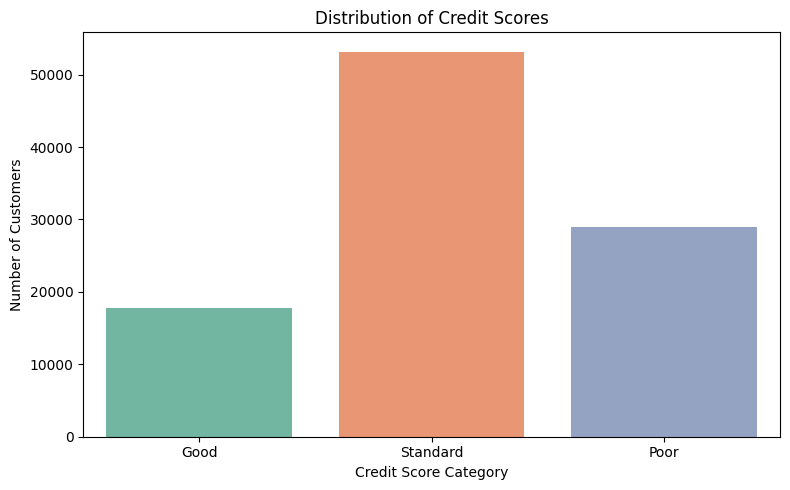

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Credit_Score', hue='Credit_Score', palette='Set2', legend=False)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?
   
A countplot (bar chart) is perfect for visualizing the frequency of each credit score category (Good, Standard, Poor), making it easy to compare.

What is/are the insight(s) found from the chart?
   
This chart shows how customers are distributed across different credit score categories. For example, if most customers fall under “Standard”, this indicates a need for financial guidance to move them toward “Good”.

Will the gained insights help create a positive business impact?

Yes. By identifying which segment has the most customers, Paisabazaar can tailor loan offers, financial tips, or credit-building products to specific groups, improving customer targeting and conversions.



#### Chart 2: Average Annual Income by Credit Score

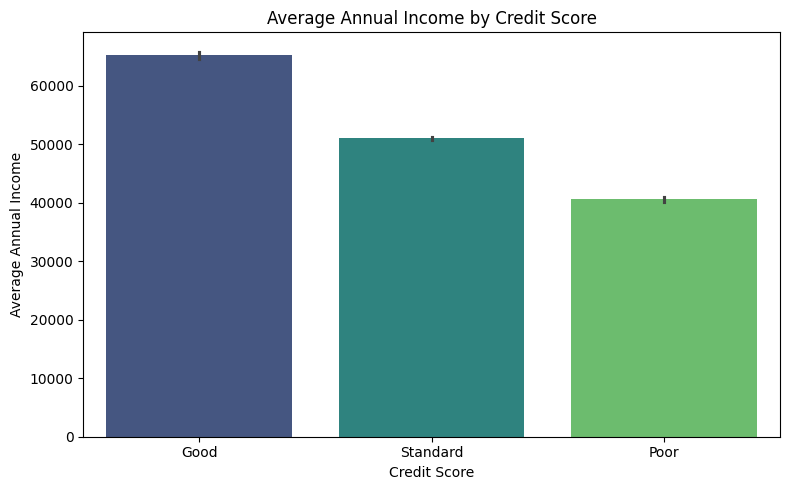

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Credit_Score', y='Annual_Income', palette='viridis')
plt.title('Average Annual Income by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Annual Income')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A bar plot is ideal for comparing average numerical values (Annual_Income) across different categories (Credit_Score).

What is/are the insight(s) found from the chart?

This chart reveals how income levels vary by credit score. Typically, customers with a “Good” credit score tend to have a higher average income, while those with a “Poor” score may earn less.

Will the gained insights help create a positive business impact?

Yes. This insight helps Paisabazaar segment users and offer premium financial products to high-income, high-credit-score users, while offering credit-improving tools or educational programs to others — leading to better customer targeting and financial inclusion.



#### Chart 3: Number of Delayed Payments by Credit Score

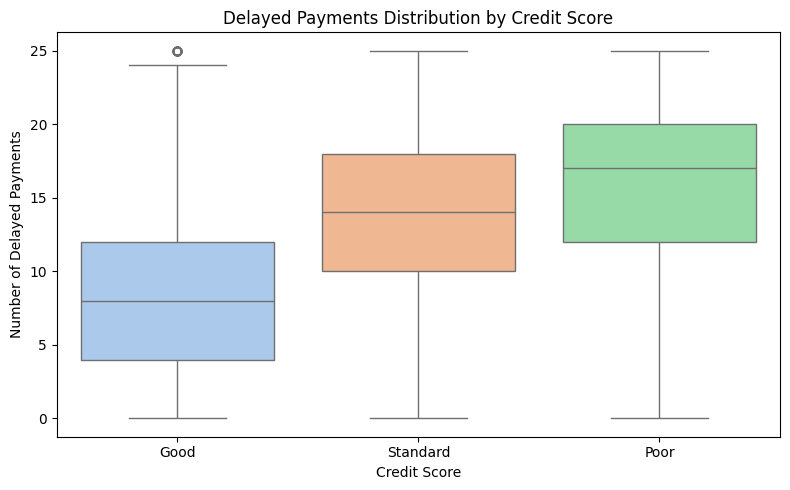

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Credit_Score', y='Num_of_Delayed_Payment', palette='pastel')
plt.title('Delayed Payments Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A box plot clearly shows the spread, median, and outliers of delayed payments across credit score categories.

What is/are the insight(s) found from the chart?

The chart reveals that users with a Poor credit score tend to have more delayed payments with wider variation, while Good credit score users usually have fewer and more consistent payment histories.

Will the gained insights help create a positive business impact?

Yes. This can help Paisabazaar design risk-based loan strategies and improve credit risk profiling. By focusing on customers with consistent payment history, the company can reduce loan defaults.



#### Chart 4: Credit Score Distribution 

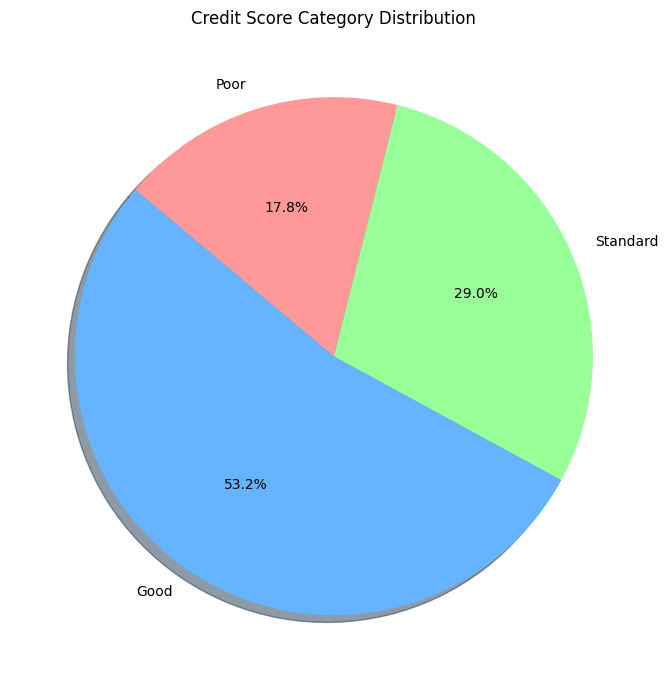

In [19]:
plt.figure(figsize=(7, 7))
df['Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, 
                                           colors=['#66b3ff', '#99ff99', '#ff9999'], 
                                           labels=['Good', 'Standard', 'Poor'], 
                                           shadow=True)
plt.title('Credit Score Category Distribution')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

A pie chart is perfect for showing the proportion of different categories in a whole. Here, it visually represents the share of each credit score type.

What is/are the insight(s) found from the chart?

We can clearly see what percentage of customers fall into each credit score group. For instance, if most customers are in the "Standard" category, that indicates a need for financial products aimed at improving their credit profile.

Will the gained insights help create a positive business impact?

Yes. This can help in targeted marketing and risk-based segmentation. Paisabazaar can design different campaigns for "Poor", "Standard", and "Good" score holders, maximizing engagement and conversions.



#### Chart 5: Average Number of Credit Cards by Age

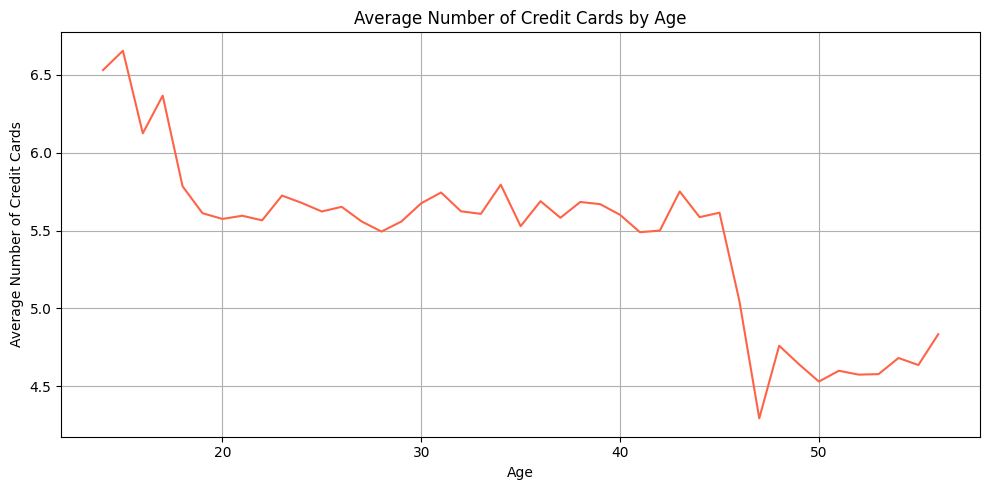

In [20]:
age_credit = df.groupby('Age')['Num_Credit_Card'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=age_credit, x='Age', y='Num_Credit_Card', color='tomato')
plt.title('Average Number of Credit Cards by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Credit Cards')
plt.grid(True)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A line chart helps visualize trends over continuous values — here, we use it to see how credit card usage changes as people age.

What is/are the insight(s) found from the chart?

We may observe a rise in credit card usage in working-age groups (30s–50s), followed by a decline in older ages, which is typical due to retirement or reduced financial activity.

Will the gained insights help create a positive business impact?

Yes. Paisabazaar can tailor credit card offers by age group — for example, targeting younger professionals with rewards cards and seniors with low-interest options.



#### Chart 6: Correlation Heatmap of Financial Metrics

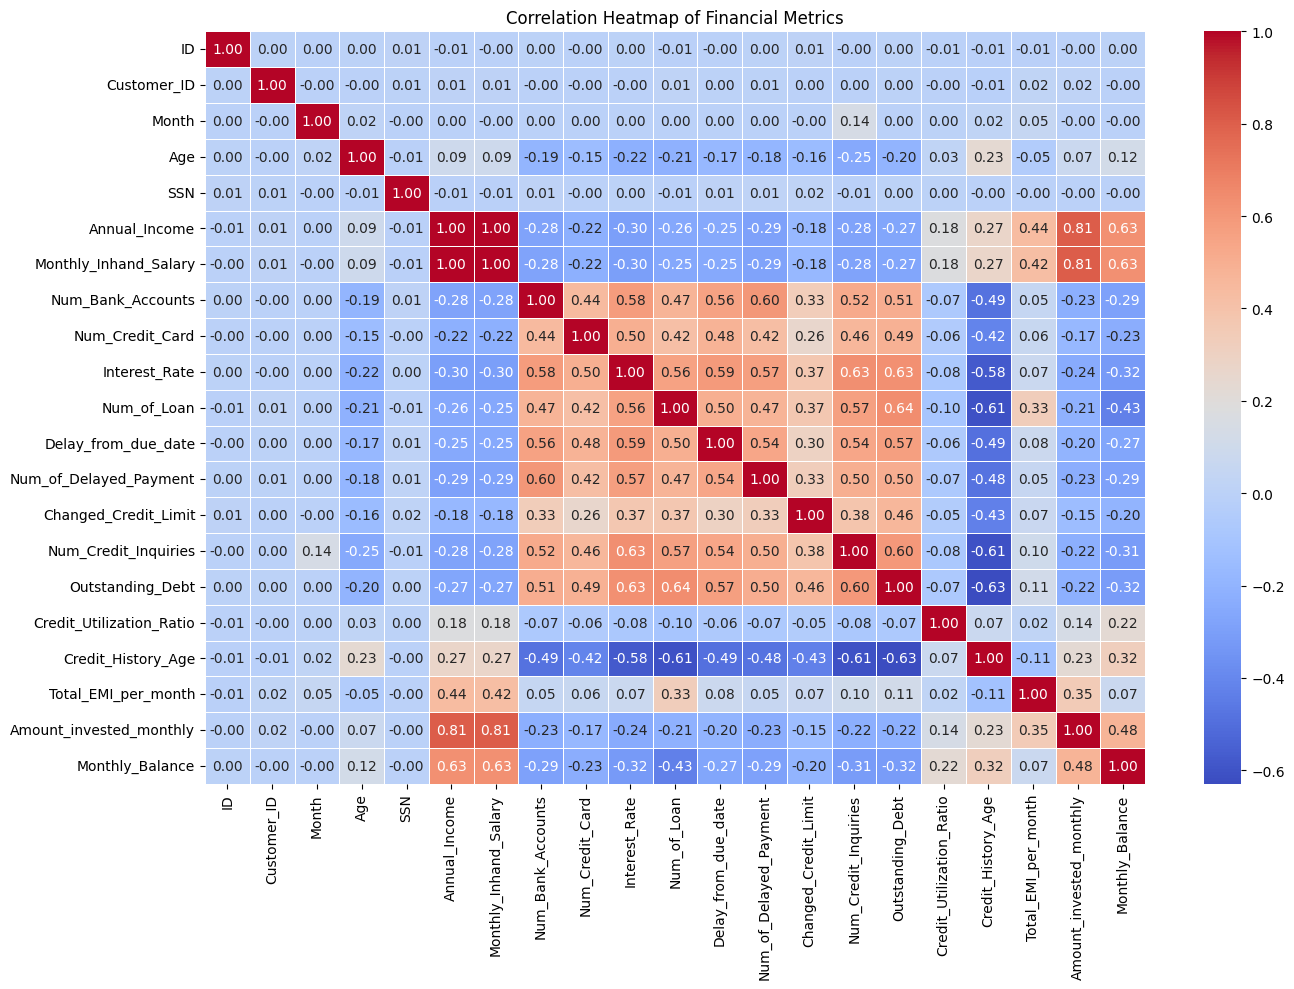

In [21]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(numeric_cols, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A heatmap is ideal for visualizing the strength and direction of correlations between numerical features in a compact and intuitive format.

What is/are the insight(s) found from the chart?

The chart reveals relationships like:
Annual_Income is positively correlated with Monthly_Inhand_Salary
Outstanding_Debt is strongly linked with Monthly_Balance
Num_of_Delayed_Payment has a negative correlation with Credit_Score

Will the gained insights help create a positive business impact?

Yes. Understanding correlations helps in feature selection for ML models, designing better credit scoring systems, and optimizing risk management strategies.

#### Chart 7: Annual Income vs Monthly Balance

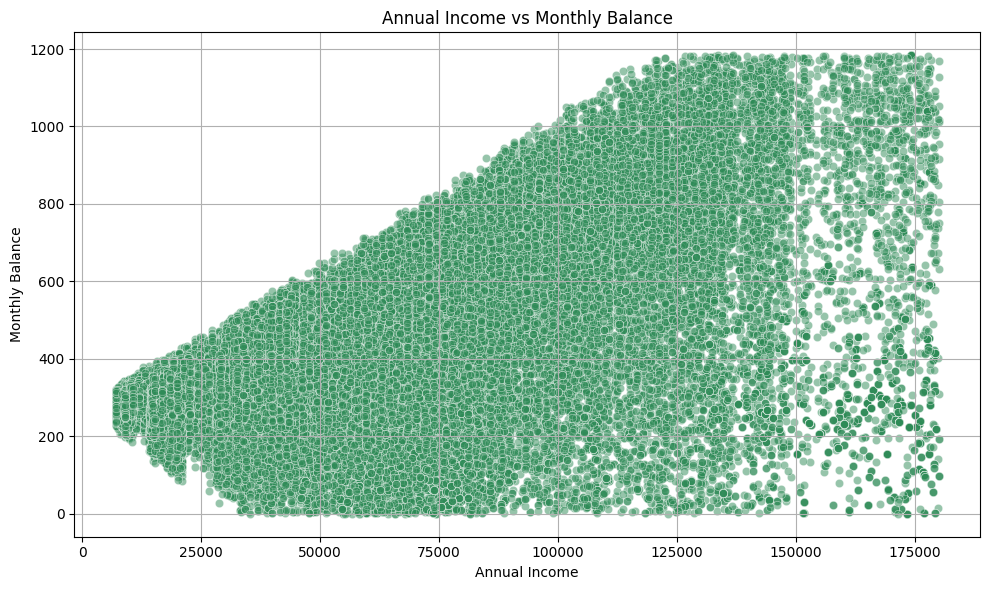

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Monthly_Balance', alpha=0.5, color='seagreen')
plt.title('Annual Income vs Monthly Balance')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A scatter plot is great for identifying the relationship or pattern between two continuous variables — in this case, income and balance.

What is/are the insight(s) found from the chart?

There appears to be a positive trend — customers with higher annual income generally tend to have higher monthly balances, although there’s some spread due to spending behavior or EMI commitments.

Will the gained insights help create a positive business impact?

Yes. This can help Paisabazaar segment customers by financial stability and offer investment plans or premium services to those with surplus balances.

#### Chart 8: Distribution of Monthly Inhand Salary

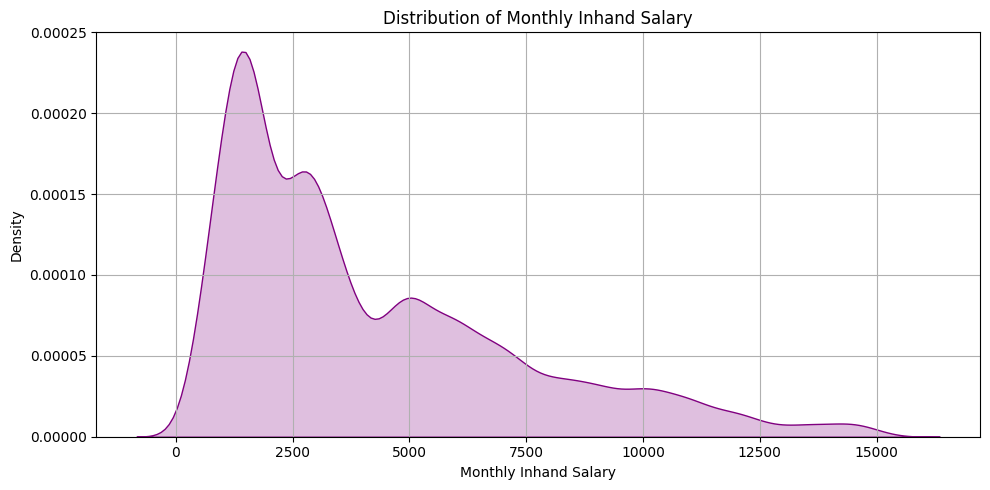

In [23]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Monthly_Inhand_Salary', fill=True, color='purple', bw_adjust=1.2)
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A KDE plot provides a smooth estimation of the data distribution. It's perfect for showing how salaries are spread without the rough edges of a histogram.

What is/are the insight(s) found from the chart?

The chart shows a peak in the mid-salary range, suggesting a large portion of customers fall within a specific monthly income band. The long tail may indicate a few high-salary individuals.

Will the gained insights help create a positive business impact?

Yes. This helps Paisabazaar understand salary demographics, enabling the design of custom financial products suited to majority income brackets.

#### Chart 9: Outstanding Debt by Credit Score

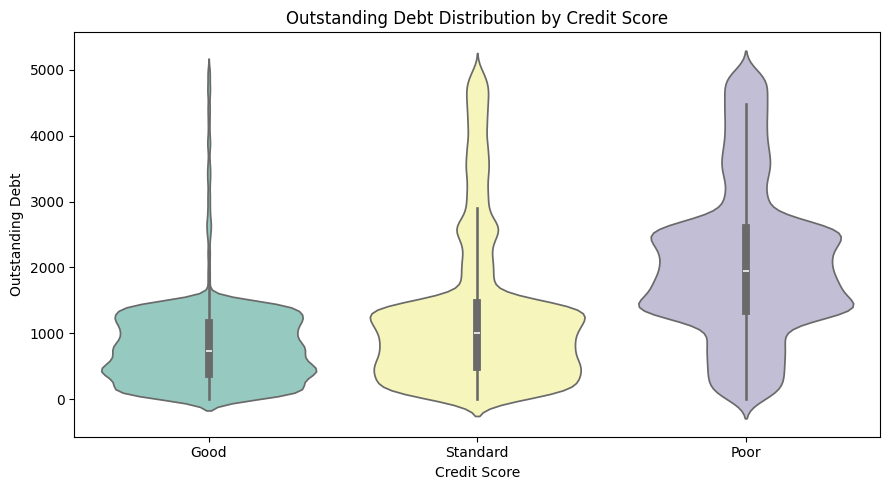

In [24]:
plt.figure(figsize=(9, 5))
sns.violinplot(data=df, x='Credit_Score', y='Outstanding_Debt', palette='Set3', inner='box')
plt.title('Outstanding Debt Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A violin plot is a great way to visualize both the distribution and density of data across categories. It combines the benefits of a boxplot and KDE plot.

What is/are the insight(s) found from the chart?

We can observe that:
Customers with a Poor credit score tend to have a wider range and more dense high debt levels
Customers with a Good credit score have a narrower, lower range of debt

Will the gained insights help create a positive business impact?

Yes. This insight helps in credit risk analysis, helping Paisabazaar flag high-debt customers for monitoring and recommend debt consolidation or advisory services.


#### Chart 10: Credit History Age Distribution 

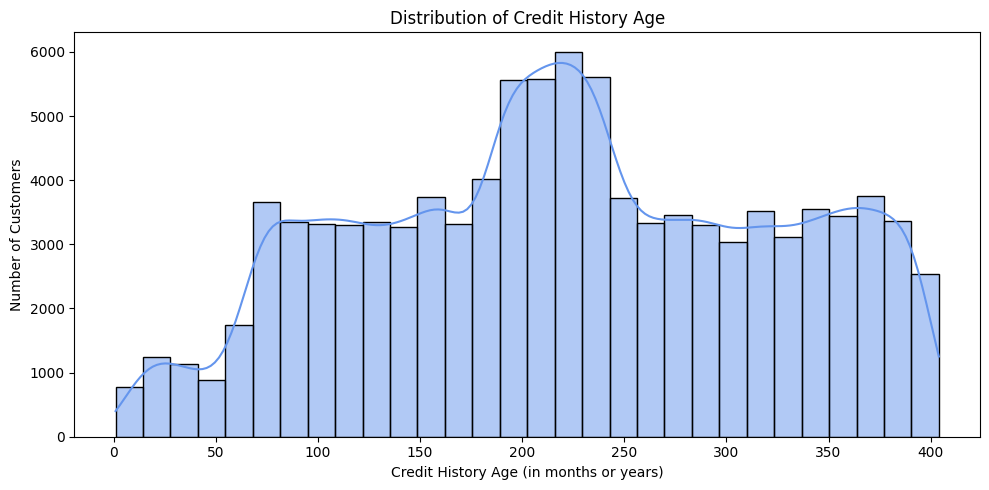

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Credit_History_Age', bins=30, color='cornflowerblue', kde=True)
plt.title('Distribution of Credit History Age')
plt.xlabel('Credit History Age (in months or years)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A histogram is great for showing the frequency of a continuous variable — here it shows how many customers fall into each credit history age range.

What is/are the insight(s) found from the chart?

Most customers seem to have short to mid-range credit history, while fewer have very long histories, which is expected as many users might be younger or recently started building credit.

Will the gained insights help create a positive business impact?

Yes. Knowing credit history length helps Paisabazaar tailor offers — such as secured credit cards or credit builder products for newer customers, and premium credit tools for seasoned ones.



#### Chart 11: Type of Loan Distribution by Credit Score

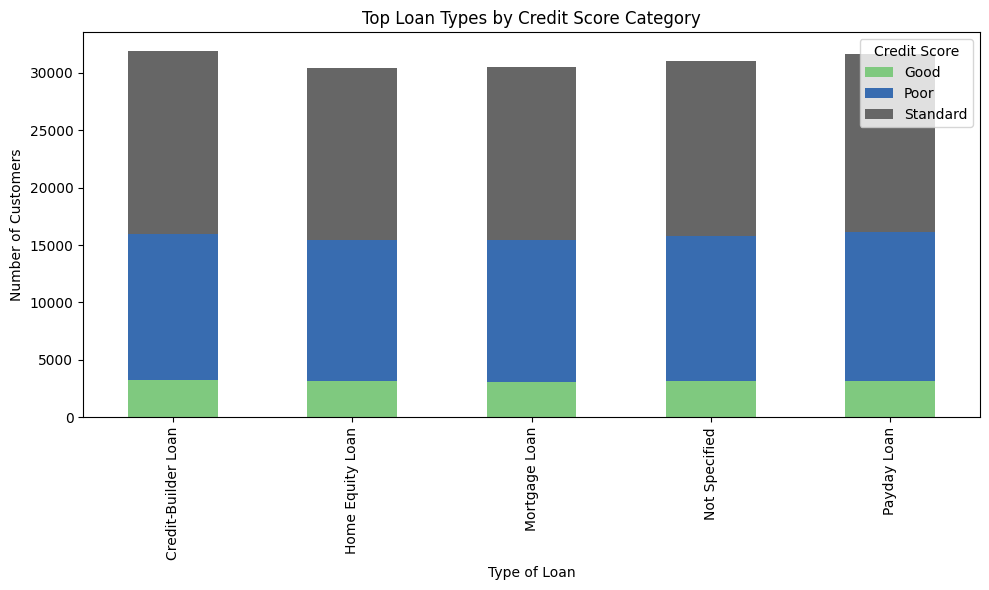

In [27]:
loan_df = df[['Credit_Score', 'Type_of_Loan']].copy()
loan_df['Type_of_Loan'] = loan_df['Type_of_Loan'].fillna('Unknown')

loan_df['Type_of_Loan'] = loan_df['Type_of_Loan'].str.split(',')
loan_df = loan_df.explode('Type_of_Loan')
loan_df['Type_of_Loan'] = loan_df['Type_of_Loan'].str.strip()

top_loans = loan_df['Type_of_Loan'].value_counts().nlargest(5).index
filtered_df = loan_df[loan_df['Type_of_Loan'].isin(top_loans)]

pivot_table = pd.crosstab(filtered_df['Type_of_Loan'], filtered_df['Credit_Score'])

# Plot stacked bar
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title('Top Loan Types by Credit Score Category')
plt.xlabel('Type of Loan')
plt.ylabel('Number of Customers')
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A stacked bar chart is perfect to show how the distribution of loan types varies across credit score categories, allowing for easy comparison within each bar.

What is/are the insight(s) found from the chart?

It highlights which loan types are most common among Good, Standard, and Poor credit score customers. For instance, Credit Card loans may be high in all categories, but Auto loans could be skewed towards better credit scores.

Will the gained insights help create a positive business impact?

Yes. This can help tailor loan product recommendations and highlight where customers may be over-leveraged (e.g., multiple loan types in poor score groups), leading to better cross-sell and risk strategies.



#### Chart 12: Monthly Balance by Credit Score

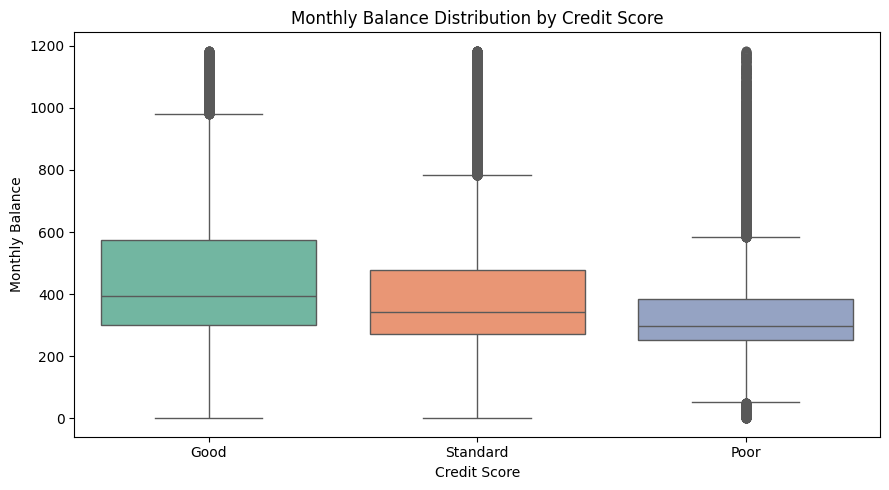

In [28]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='Credit_Score', y='Monthly_Balance', palette='Set2')
plt.title('Monthly Balance Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Balance')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A boxplot is ideal for comparing the spread, median, and outliers of a numerical variable across categories. It gives a compact summary of distribution per credit score.

What is/are the insight(s) found from the chart?

Customers with a Good credit score typically maintain a higher and more stable monthly balance
Those with a Poor credit score often show lower and more varied balances

Will the gained insights help create a positive business impact?

Yes. Paisabazaar can use this insight to:
Offer investment or saving options to high-balance users
Target low-balance users with budgeting tools or credit-building products

#### Chart 13: Financial Feature Relationships (Pairplot)

<Figure size 640x480 with 0 Axes>

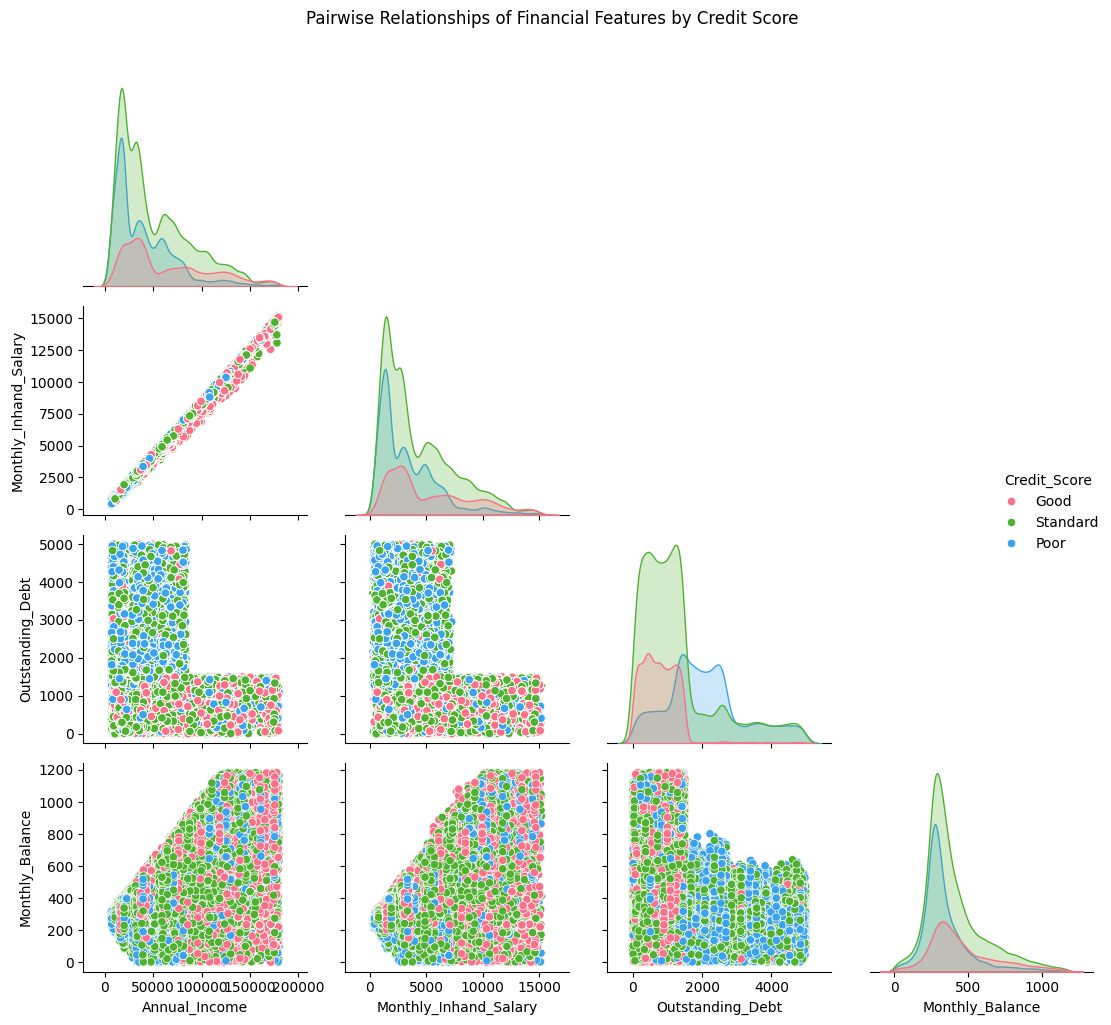

In [29]:
selected_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 
                 'Monthly_Balance', 'Credit_Score']

plt.figure()
sns.pairplot(df[selected_cols], hue='Credit_Score', palette='husl', corner=True)
plt.suptitle('Pairwise Relationships of Financial Features by Credit Score', y=1.02)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A pairplot is powerful for visualizing pairwise relationships and distributions among several numerical variables, while also showing class-based coloring with hue.

What is/are the insight(s) found from the chart?

We can observe:
Positive correlation between Annual Income & Monthly Salary.Clear clusters of "Good" credit score users with higher income, salary, and balance.Scattered and overlapping patterns in "Standard" and "Poor" score categories

Will the gained insights help create a positive business impact?

Yes. These visual patterns help in:Feature selection for ML models,Understanding the financial health of customers and Improving targeted financial planning tools

#### Chart 14: Customer Occupation Distribution

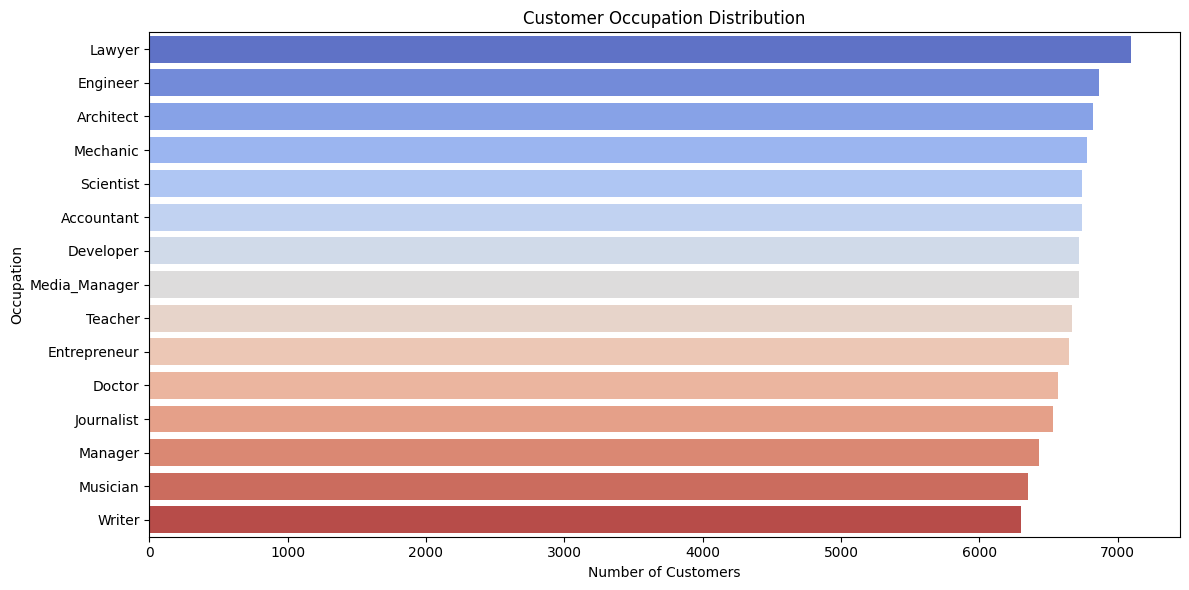

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='coolwarm')
plt.title('Customer Occupation Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A horizontal bar chart makes it easy to compare the number of customers across different occupation types, especially when there are many categories.

What is/are the insight(s) found from the chart?

The chart shows which occupations dominate the customer base. This helps identify the core working groups using Paisabazaar's services — such as engineers, doctors, or managers.

Will the gained insights help create a positive business impact?

Yes. This helps in offering customized financial products based on profession. For example, doctors and engineers may need professional loans or tax planning tools, while students may benefit from starter credit services.

#### Chart 15: Payment Behaviour Distribution

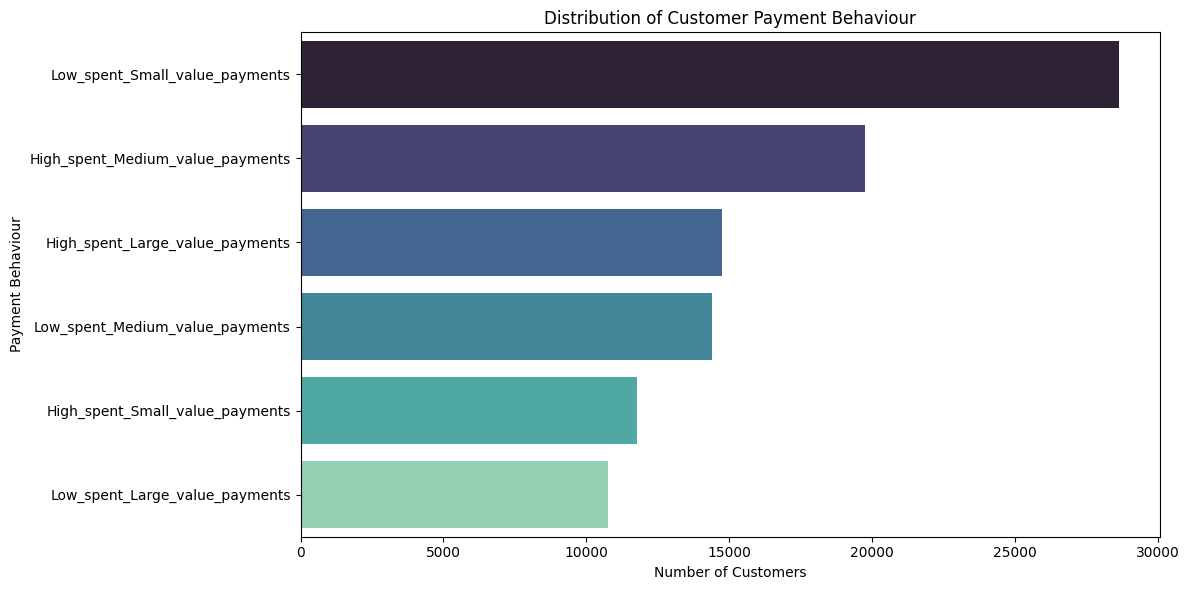

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Payment_Behaviour', order=df['Payment_Behaviour'].value_counts().index, palette='mako')
plt.title('Distribution of Customer Payment Behaviour')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Behaviour')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing the frequency of different payment behaviour types, which often contain descriptive text and need more space to read.

What is/are the insight(s) found from the chart?

It reveals the most common payment behaviours such as “High_spent_Large_value_payments” or “Low_spent_Small_value_payments”. This highlights how responsible or risky a customer might be.

Will the gained insights help create a positive business impact?

Yes. Understanding payment behaviour is crucial for credit scoring, fraud detection, and personalized financial advice. It helps tailor product offerings and risk strategies accordingly.



#### Chart 16: Total EMI per Month by Age (Area Chart)

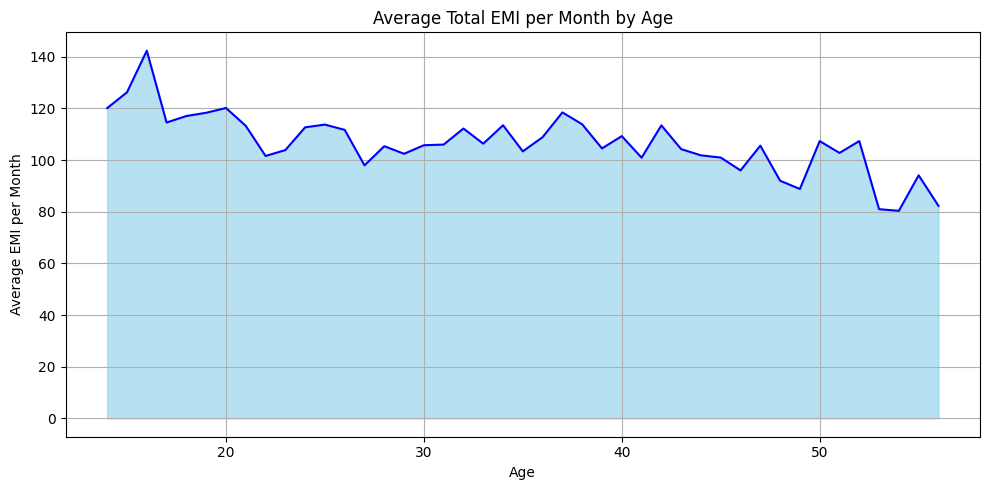

In [32]:
emi_by_age = df.groupby('Age')['Total_EMI_per_month'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.fill_between(emi_by_age['Age'], emi_by_age['Total_EMI_per_month'], color='skyblue', alpha=0.6)
plt.plot(emi_by_age['Age'], emi_by_age['Total_EMI_per_month'], color='blue')
plt.title('Average Total EMI per Month by Age')
plt.xlabel('Age')
plt.ylabel('Average EMI per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

An area chart clearly shows trends over a continuous variable like age, and it emphasizes both the values and the flow of the curve for EMI obligations.

What is/are the insight(s) found from the chart?

The chart shows that EMI payments tend to rise with age up to a working-age peak (30s–40s) and then gradually decline. This reflects life stages — buying assets early and then repaying or reducing debt later.

Will the gained insights help create a positive business impact?

Yes. Understanding when users are likely to have higher EMIs can help Paisabazaar offer debt management, refinancing, or insurance-linked loan products tailored to life stages.

#### Chart 17: Number of Credit Cards Owned

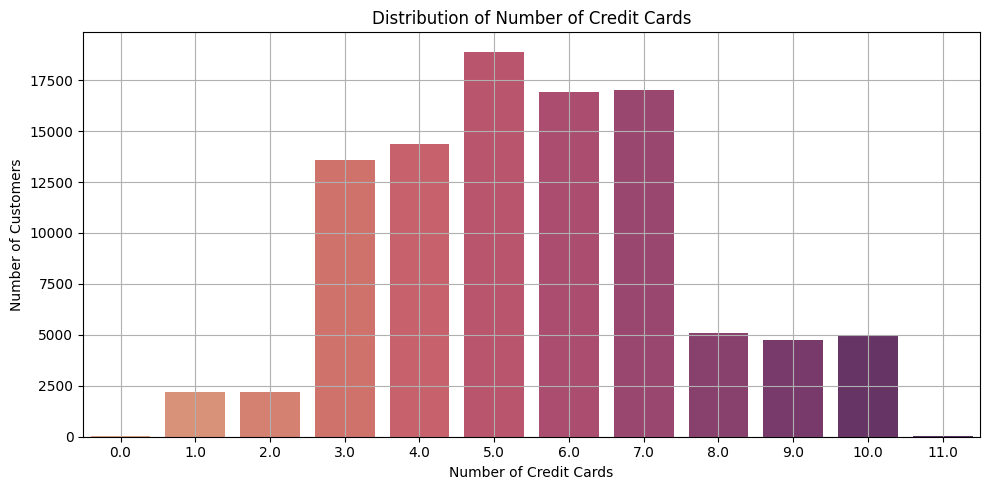

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Num_Credit_Card', palette='flare')
plt.title('Distribution of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A bar chart makes it super easy to compare how many customers fall into each credit card ownership count, helping identify spending capacity and credit engagement.

What is/are the insight(s) found from the chart?

Most customers own 2–4 credit cards, while very few hold more than 6. This indicates moderate adoption of credit products, possibly due to income or eligibility.

Will the gained insights help create a positive business impact?

Yes. This helps Paisabazaar to Identify cross-sell opportunities for new credit card products and Target multi-card holders with balance transfer offers or premium card upgrades

#### Chart 18: Credit Utilization Ratio vs Outstanding Debt (Scatter Plot)

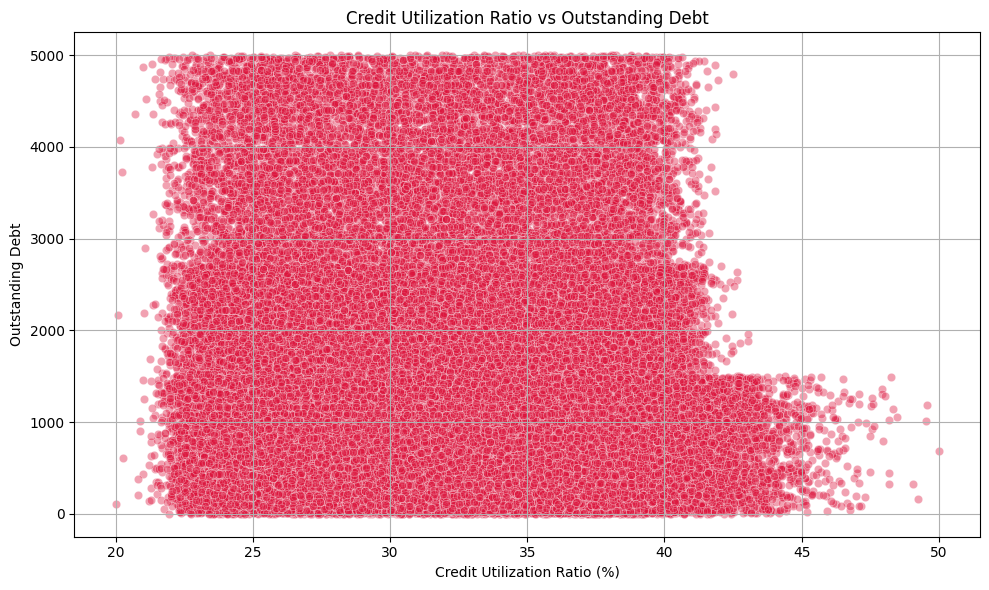

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Utilization_Ratio', y='Outstanding_Debt', alpha=0.4, color='crimson')
plt.title('Credit Utilization Ratio vs Outstanding Debt')
plt.xlabel('Credit Utilization Ratio (%)')
plt.ylabel('Outstanding Debt')
plt.grid(True)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A scatter plot helps in identifying patterns or outliers in the relationship between credit usage and debt levels — which are both critical risk factors.

What is/are the insight(s) found from the chart?

We can see that customers with high credit utilization ratios often have significantly high outstanding debt, indicating possible credit stress or over-leverage.

Will the gained insights help create a positive business impact?

Definitely. This can help Paisabazaar to Flag high-risk customers for credit limit review and Recommend debt consolidation or credit counseling services

#### Chart 19: Distribution of Credit Mix Types

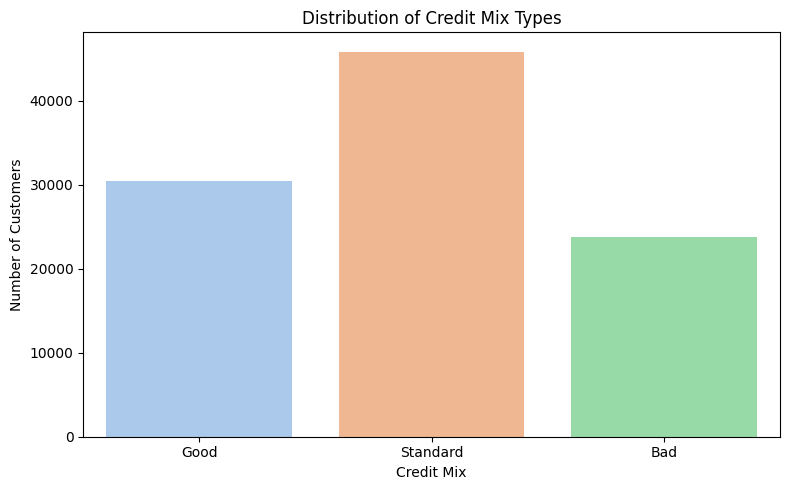

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Credit_Mix', palette='pastel')
plt.title('Distribution of Credit Mix Types')
plt.xlabel('Credit Mix')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A bar chart is perfect for comparing how customers are distributed among different credit mix categories like Good, Standard, and Bad.

What is/are the insight(s) found from the chart?

Most customers fall under the Standard and Good categories, while Bad credit mix is relatively rare — showing positive credit behavior among the majority.

Will the gained insights help create a positive business impact?

Yes. Paisabazaar can Offer better credit products to “Good” mix holders and Focus rehabilitation plans for “Bad” mix users to improve financial well-being



#### Chart 20: Credit Score Distribution (Donut Pie Chart)

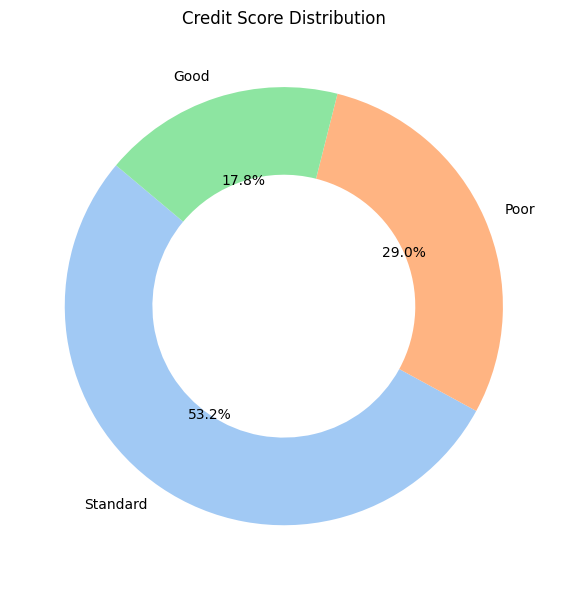

In [36]:
credit_score_counts = df['Credit_Score'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:5]
plt.pie(credit_score_counts, labels=credit_score_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Credit Score Distribution')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A donut pie chart gives a clean and intuitive representation of proportion-based data like Credit Score categories, with a modern, aesthetic touch.

What is/are the insight(s) found from the chart?

The chart clearly shows that a majority of customers fall under the Standard and Good categories, while Poor credit scores are less frequent.

Will the gained insights help create a positive business impact?

Yes. Knowing the credit score composition helps Paisabazaar in:Personalizing product offerings by score level and Creating credit education campaigns for lower-score users,Prioritizing risk-free lending to high-score customers



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

To achieve its business goals, Paisabazaar should:

Segment customers based on financial behavior such as EMI, outstanding debt, and credit score to offer personalized loan and investment products.

Identify high-risk profiles using insights from credit utilization and delayed payments, enabling better credit decisions and reducing defaults.

Target key occupations and age groups with suitable financial products by analyzing income levels, balance trends, and payment patterns.

Leverage payment behavior insights to build better predictive models and create personalized repayment or advisory plans for different customers.


# **Conclusion**

This project provided valuable insights into customer financial behavior using Paisabazaar’s dataset. By analyzing income, credit scores, outstanding debt, and payment patterns, we identified key risk profiles and customer segments. The trends observed across age, occupation, and credit utilization can guide personalized financial offerings and smarter credit decisions. These findings support better targeting, reduced default risk, and improved customer satisfaction. Overall, the analysis empowers Paisabazaar to make data-driven business strategies more effective.

### ***Hurrah! I have successfully completed my EDA Capstone Project !!!***